In [3]:
import pandas as pd 
import numpy as np 
import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
import os

print(os.listdir("data/"))

['creditcard.csv.zip', 'data.zip', 'inpatientCharges.zip', 'Inpatient_prospective_payment.zip', 'purchase_credit_card.zip', 'res_purchase_card.zip', 'S&P Benchmark.zip', 'Twillio_data.zip', 'us_regions.zip', 'Variables_Dictionary_2019.zip', 'XYZloan_default_adj.zip', 'XYZloan_default_selected_vars.zip']


In [10]:
dat = pd.read_csv("data/data.zip")

dat.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,ratio_average_covered_charges,ratio_average_total_payment,ratio_average_medicare_payments,ratio_oop_payment,ratio_oop_payment_ratio,ratio_payment_coverage,ratio_medicare_pct_paid,region_avg_medicare_paid,Medicare Paid Ratio,K Means 1
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,0.908445,1.037810,1.038763,1.033356,0.691641,1.128919,5.311252,0.823783,1.000954,0
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,0.376065,1.008540,1.080948,0.714704,1.274242,1.873207,4.211412,0.804224,1.069224,3
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,0.933470,0.947092,0.967369,0.864809,0.899420,0.708675,4.013431,0.804224,1.018959,0
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,0.347893,0.944062,0.896859,1.135614,1.133822,1.895443,3.732842,0.804224,0.947721,3
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,0.786167,0.986018,1.053739,0.711205,0.986225,0.876044,4.199175,0.804224,1.066118,0


In [11]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 37 columns):
Unnamed: 0                                     163065 non-null int64
DRG Definition                                 163065 non-null object
Provider Id                                    163065 non-null int64
Provider Name                                  163065 non-null object
Provider City                                  163065 non-null object
Provider State                                 163065 non-null object
Provider Zip Code                              163065 non-null int64
Hospital Referral Region Description           163065 non-null object
Total Discharges                               163065 non-null int64
Average Covered Charges                        163065 non-null float64
Average Total Payments                         163065 non-null float64
Average Medicare Payments                      163065 non-null float64
Out of Pocket Payment                          163

There are some unneeded columns: unnamed kmeans. Let's dropping them first!

In [20]:
dat = dat.drop(columns=['Unnamed: 0', 'K Means 1'])

In [21]:
print("There are %d number of observation with %d number of features." %(dat.shape[0], dat.shape[1]))

There are 163065 number of observation with 35 number of features.


In [22]:
print("There are {} number of uniq Providers are in the data".format(len(set(dat['Provider Id']))))

There are 3337 number of uniq Providers are in the data


Based on the description of each column, many of the columns seems to be highly correlated.
For that reason, it is good to perform PCA or other types of demetion reduction techniques.

In [69]:
# looking at the correlataion for the numerical variables: 

num_dat = dat._get_numeric_data()

num_dat = num_dat.drop(['Provider Id', 'Provider Zip Code'], axis = 1)
num_dat.head()


,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Out of Pocket Payment,Coverage Ratio,Out of Pocket per discharge,Payment Covered Percentage,Medicare % Paid,mean_discharge_per_drg_state_region,...,total_discharge_ratio,ratio_average_covered_charges,ratio_average_total_payment,ratio_average_medicare_payments,ratio_oop_payment,ratio_oop_payment_ratio,ratio_payment_coverage,ratio_medicare_pct_paid,region_avg_medicare_paid,Medicare Paid Ratio
0,91,32963.07,5777.24,4763.73,1013.51,5.705678,11.137473,0.175264,0.824568,68.000000,...,1.338235,0.908445,1.037810,1.038763,1.033356,0.691641,1.128919,5.311252,0.823783,1.000954
1,14,15131.85,5787.57,4976.71,810.86,2.614543,57.918571,0.382476,0.859896,27.461538,...,0.509804,0.376065,1.008540,1.080948,0.714704,1.274242,1.873207,4.211412,0.804224,1.069224
2,24,37560.37,5434.95,4453.79,981.16,6.910895,40.881667,0.144699,0.819472,27.461538,...,0.873950,0.933470,0.947092,0.967369,0.864809,0.899420,0.708675,4.013431,0.804224,1.018959
3,25,13998.28,5417.56,4129.16,1288.40,2.583872,51.536000,0.387016,0.762181,27.461538,...,0.910364,0.347893,0.944062,0.896859,1.135614,1.133822,1.895443,3.732842,0.804224,0.947721
4,18,31633.27,5658.33,4851.44,806.89,5.590566,44.827222,0.178873,0.857398,27.461538,...,0.655462,0.786167,0.986018,1.053739,0.711205,0.986225,0.876044,4.199175,0.804224,1.066118


In [48]:
def correlation(dataset, threshold):
    """
    Remove columns that do exceeed correlation threshold
    """
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return dataset

In [70]:
from sklearn.preprocessing import StandardScaler

# First need to standarize the numbers:
scal_num_dat = StandardScaler().fit_transform(num_dat)
# Get the column names for later
scal_num_dat_name = num_dat.columns

scal_num_dat = pd.DataFrame(scal_num_dat, columns= scal_num_dat_name)
new_num_dat = correlation(scal_num_dat, 0.7) # 0.7 is just an arbitary numb

In [58]:
new_num_dat.shape

(163065, 17)

From 28 features to 17 features down after applying the function, correlation with threshold 0.7

In [64]:
# Lets try VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X, thresh):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
    
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [71]:
vif_num_dat = calculate_vif_(scal_num_dat, thresh= 10)

vif_num_dat.shape

dropping 'Coverage Ratio' at index: 3
Remaining variables:
Index(['Total Discharges', 'Average Covered Charges', 'Out of Pocket Payment',
       'Payment Covered Percentage', 'Medicare % Paid',
       'mean_discharge_per_drg_state_region',
       'mean_trans_per_drg_state_region', 'mean_oop_drg_state_region',
       'total_discharge_ratio', 'ratio_average_covered_charges',
       'ratio_average_total_payment', 'ratio_oop_payment',
       'ratio_oop_payment_ratio', 'ratio_payment_coverage',
       'ratio_medicare_pct_paid', 'Medicare Paid Ratio'],
      dtype='object')


(163065, 16)

Unlike Correlation with higher than 0.7, VIF less than 10 deletes 1 more. So, now it is down to 16 features

from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant

#X = add_constant(scal_num_dat)
X = scal_num_dat.assign(const=1)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Now, trying PCA

In [74]:
from sklearn.decomposition import PCA

pca = PCA()
pca_fit = pca.fit_transform(scal_num_dat)  

explained_ratio = pca.explained_variance_ratio_
explained_ratio = np.round(explained_ratio, 2)
np.cumsum(explained_ratio)

array([0.2 , 0.4 , 0.53, 0.63, 0.71, 0.78, 0.85, 0.9 , 0.94, 0.96, 0.97,
       0.98, 0.99, 1.  , 1.  , 1.  , 1.  ])

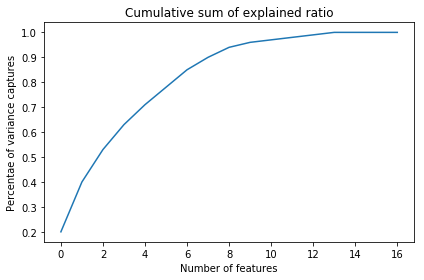

In [75]:
plt.plot(np.cumsum(explained_ratio))
plt.title('Cumulative sum of explained ratio')
plt.xlabel('Number of features')
plt.ylabel('Percentae of variance captures')
plt.tight_layout()
plt.show()

In [82]:
pca_col_names = scal_num_dat_name[:9]
pca = PCA(n_components=9)
pca_fit = pca.fit_transform(scal_num_dat)
pca_dat = pd.DataFrame(pca_fit,columns=pca_col_names)
pca_dat.head()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Out of Pocket Payment,Coverage Ratio,Out of Pocket per discharge,Payment Covered Percentage,Medicare % Paid
0,-1.417455,-0.290937,0.644492,0.452583,1.246787,-0.656490,-1.501033,1.499419,0.662739
1,2.046977,-1.475257,-1.779149,1.121475,1.456822,-0.653159,-1.334406,0.156520,0.847974
2,-1.937710,-0.195536,-0.856678,-0.574221,0.208005,-0.722949,-0.471518,-0.053341,0.543469
3,2.397575,0.247511,-0.878711,0.617633,1.258441,-1.460626,-2.003309,-0.113161,0.414883
4,-1.159807,-0.998085,-1.301973,-0.111845,0.461370,-0.482905,-0.406555,0.065972,0.729457


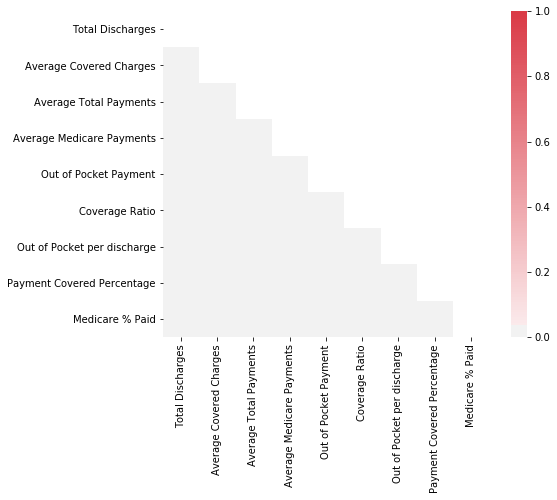

In [84]:
fig = plt.figure(figsize=(8,6))
corr = pca_dat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and caorrect aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True)
plt.show()

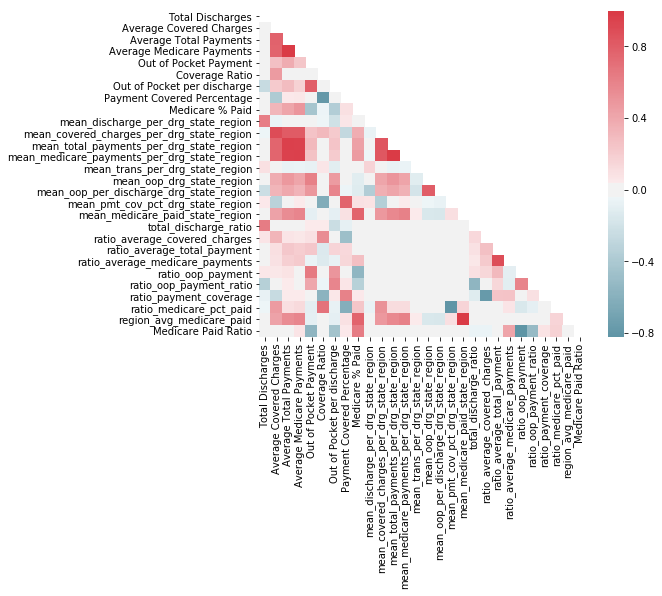

In [85]:
fig = plt.figure(figsize=(8,6))
corr = num_dat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and caorrect aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True)
plt.show()

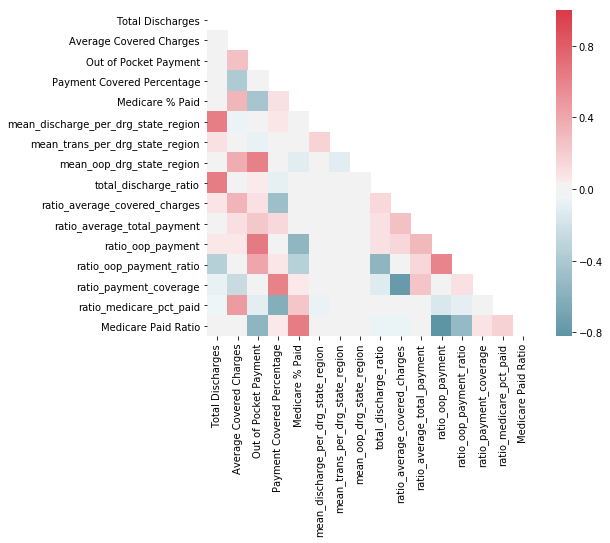

In [86]:
fig = plt.figure(figsize=(8,6))
corr = vif_num_dat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and caorrect aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True)
plt.show()

Above all, PCA has done the best job so far in selecting uncorrelated variabels with highest explanation. This can be confirmed with simple regression later!

DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
pca_db = DBSCAN(eps=0.3, min_samples=20).fit(pca_dat)
pca_db_labels = pca_db.labels_
len(set(pca_db_labels))

6

In [89]:
cluster, count = np.unique(pca_db_labels, return_counts=True)
dict(zip(cluster, count))

{-1: 162656, 0: 293, 1: 19, 2: 44, 3: 33, 4: 20}

In [90]:
# consolidate outlier 
new_labels = []
for i in pca_db_labels: 
    if i == -1: 
        new_labels.append('Normal')
    else: 
        new_labels.append('Outlier')

np.unique(new_labels, return_counts=True)        

(array(['Normal', 'Outlier'], dtype='<U7'),
 array([162656,    409], dtype=int64))

In [92]:
pca_dat['DB Scan Label'] = new_labels 
pca_dat['DB Scan Label'].value_counts()

Normal     162656
Outlier       409
Name: DB Scan Label, dtype: int64

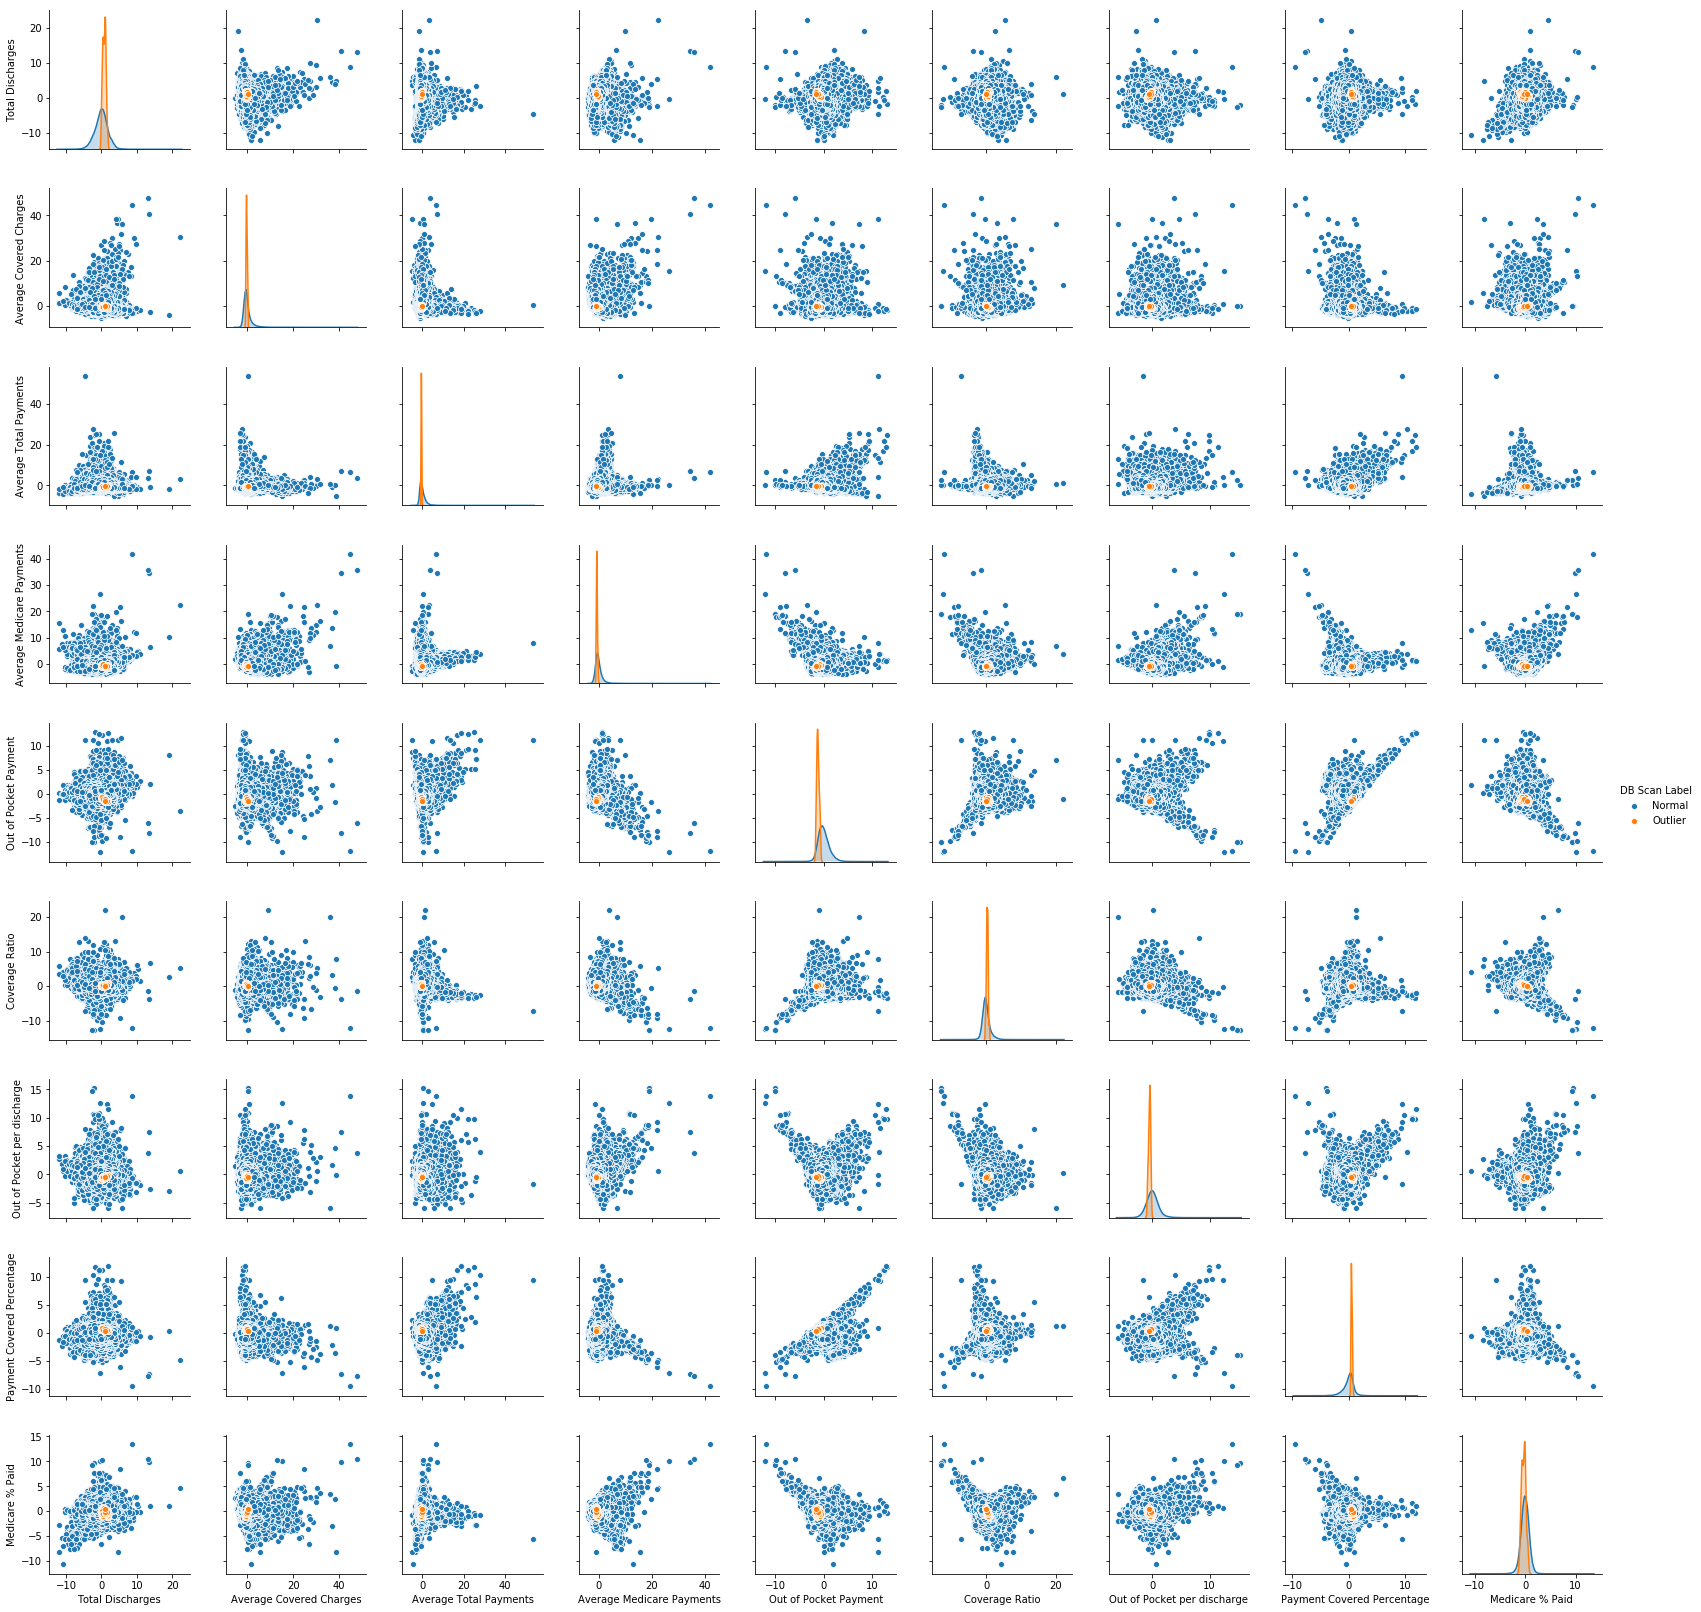

In [93]:
sns.pairplot(pca_dat, hue = 'DB Scan Label')

vif_dat

In [102]:
# Compute DBSCAN on scaled data 
vif_db = DBSCAN(eps=0.3, min_samples=20).fit(vif_num_dat)
vif_db_labels = vif_db.labels_
len(set(vif_db_labels))

6

In [103]:
vif_cluster, count = np.unique(vif_db_labels, return_counts=True)
dict(zip(vif_cluster, count))

{-1: 162667, 0: 190, 1: 118, 2: 55, 3: 15, 4: 20}

In [104]:
# consolidate outlier 
new_labels = []
for i in vif_db_labels: 
    if i == -1: 
        new_labels.append('Normal')
    else: 
        new_labels.append('Outlier')

np.unique(new_labels, return_counts=True)        

(array(['Normal', 'Outlier'], dtype='<U7'),
 array([162667,    398], dtype=int64))

In [105]:
vif_num_dat['DB Scan Label'] = new_labels 

vif_num_dat['DB Scan Label'].value_counts()

Normal     162667
Outlier       398
Name: DB Scan Label, dtype: int64

In [110]:
vif_num_dat[vif_num_dat['DB Scan Label'] == 'Outlier']

,Total Discharges,Average Covered Charges,Out of Pocket Payment,Payment Covered Percentage,Medicare % Paid,mean_discharge_per_drg_state_region,mean_trans_per_drg_state_region,mean_oop_drg_state_region,total_discharge_ratio,ratio_average_covered_charges,ratio_average_total_payment,ratio_oop_payment,ratio_oop_payment_ratio,ratio_payment_coverage,ratio_medicare_pct_paid,Medicare Paid Ratio,DB Scan Label
373,-0.465254,-0.238994,-0.235018,-0.134516,0.502703,-0.741436,-1.035249,-0.384760,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.032119,3.167149e-15,Outlier
494,-0.621798,-0.466892,-0.254877,-0.055701,0.115590,-0.990906,-1.035249,-0.417272,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.233591,3.167149e-15,Outlier
734,-0.582662,-0.561455,-0.239382,0.290805,0.066636,-0.928539,-1.035249,-0.391904,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.614046,3.167149e-15,Outlier
737,-0.504390,-0.558410,-0.363814,0.399312,0.398571,-0.803803,-1.035249,-0.595618,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.642966,3.167149e-15,Outlier
826,-0.406550,-0.578085,-0.165233,0.322570,-0.125746,-0.647884,-1.035249,-0.270511,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.680193,3.167149e-15,Outlier
1072,-0.621798,-0.602888,-0.344504,0.257881,0.116246,-0.990906,-1.035249,-0.564004,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.574000,3.167149e-15,Outlier
1218,-0.563094,-0.543542,-0.426657,0.220443,0.457427,-0.897355,-1.035249,-0.698502,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.467772,3.167149e-15,Outlier
1255,-0.328278,-0.464524,-0.379275,-0.308377,0.154911,-0.523149,-1.035249,-0.620929,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,0.150096,3.167149e-15,Outlier
1261,-0.445686,-0.568084,-0.170529,-0.065719,-0.462233,-0.710252,-1.035249,-0.279181,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.359702,3.167149e-15,Outlier
1353,-0.504390,-0.645023,-0.478169,0.673966,0.515899,-0.803803,-1.035249,-0.782834,0.0,-6.986297e-16,-1.395237e-15,5.007187e-16,0.0,-6.930143e-16,-0.828836,3.167149e-15,Outlier


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

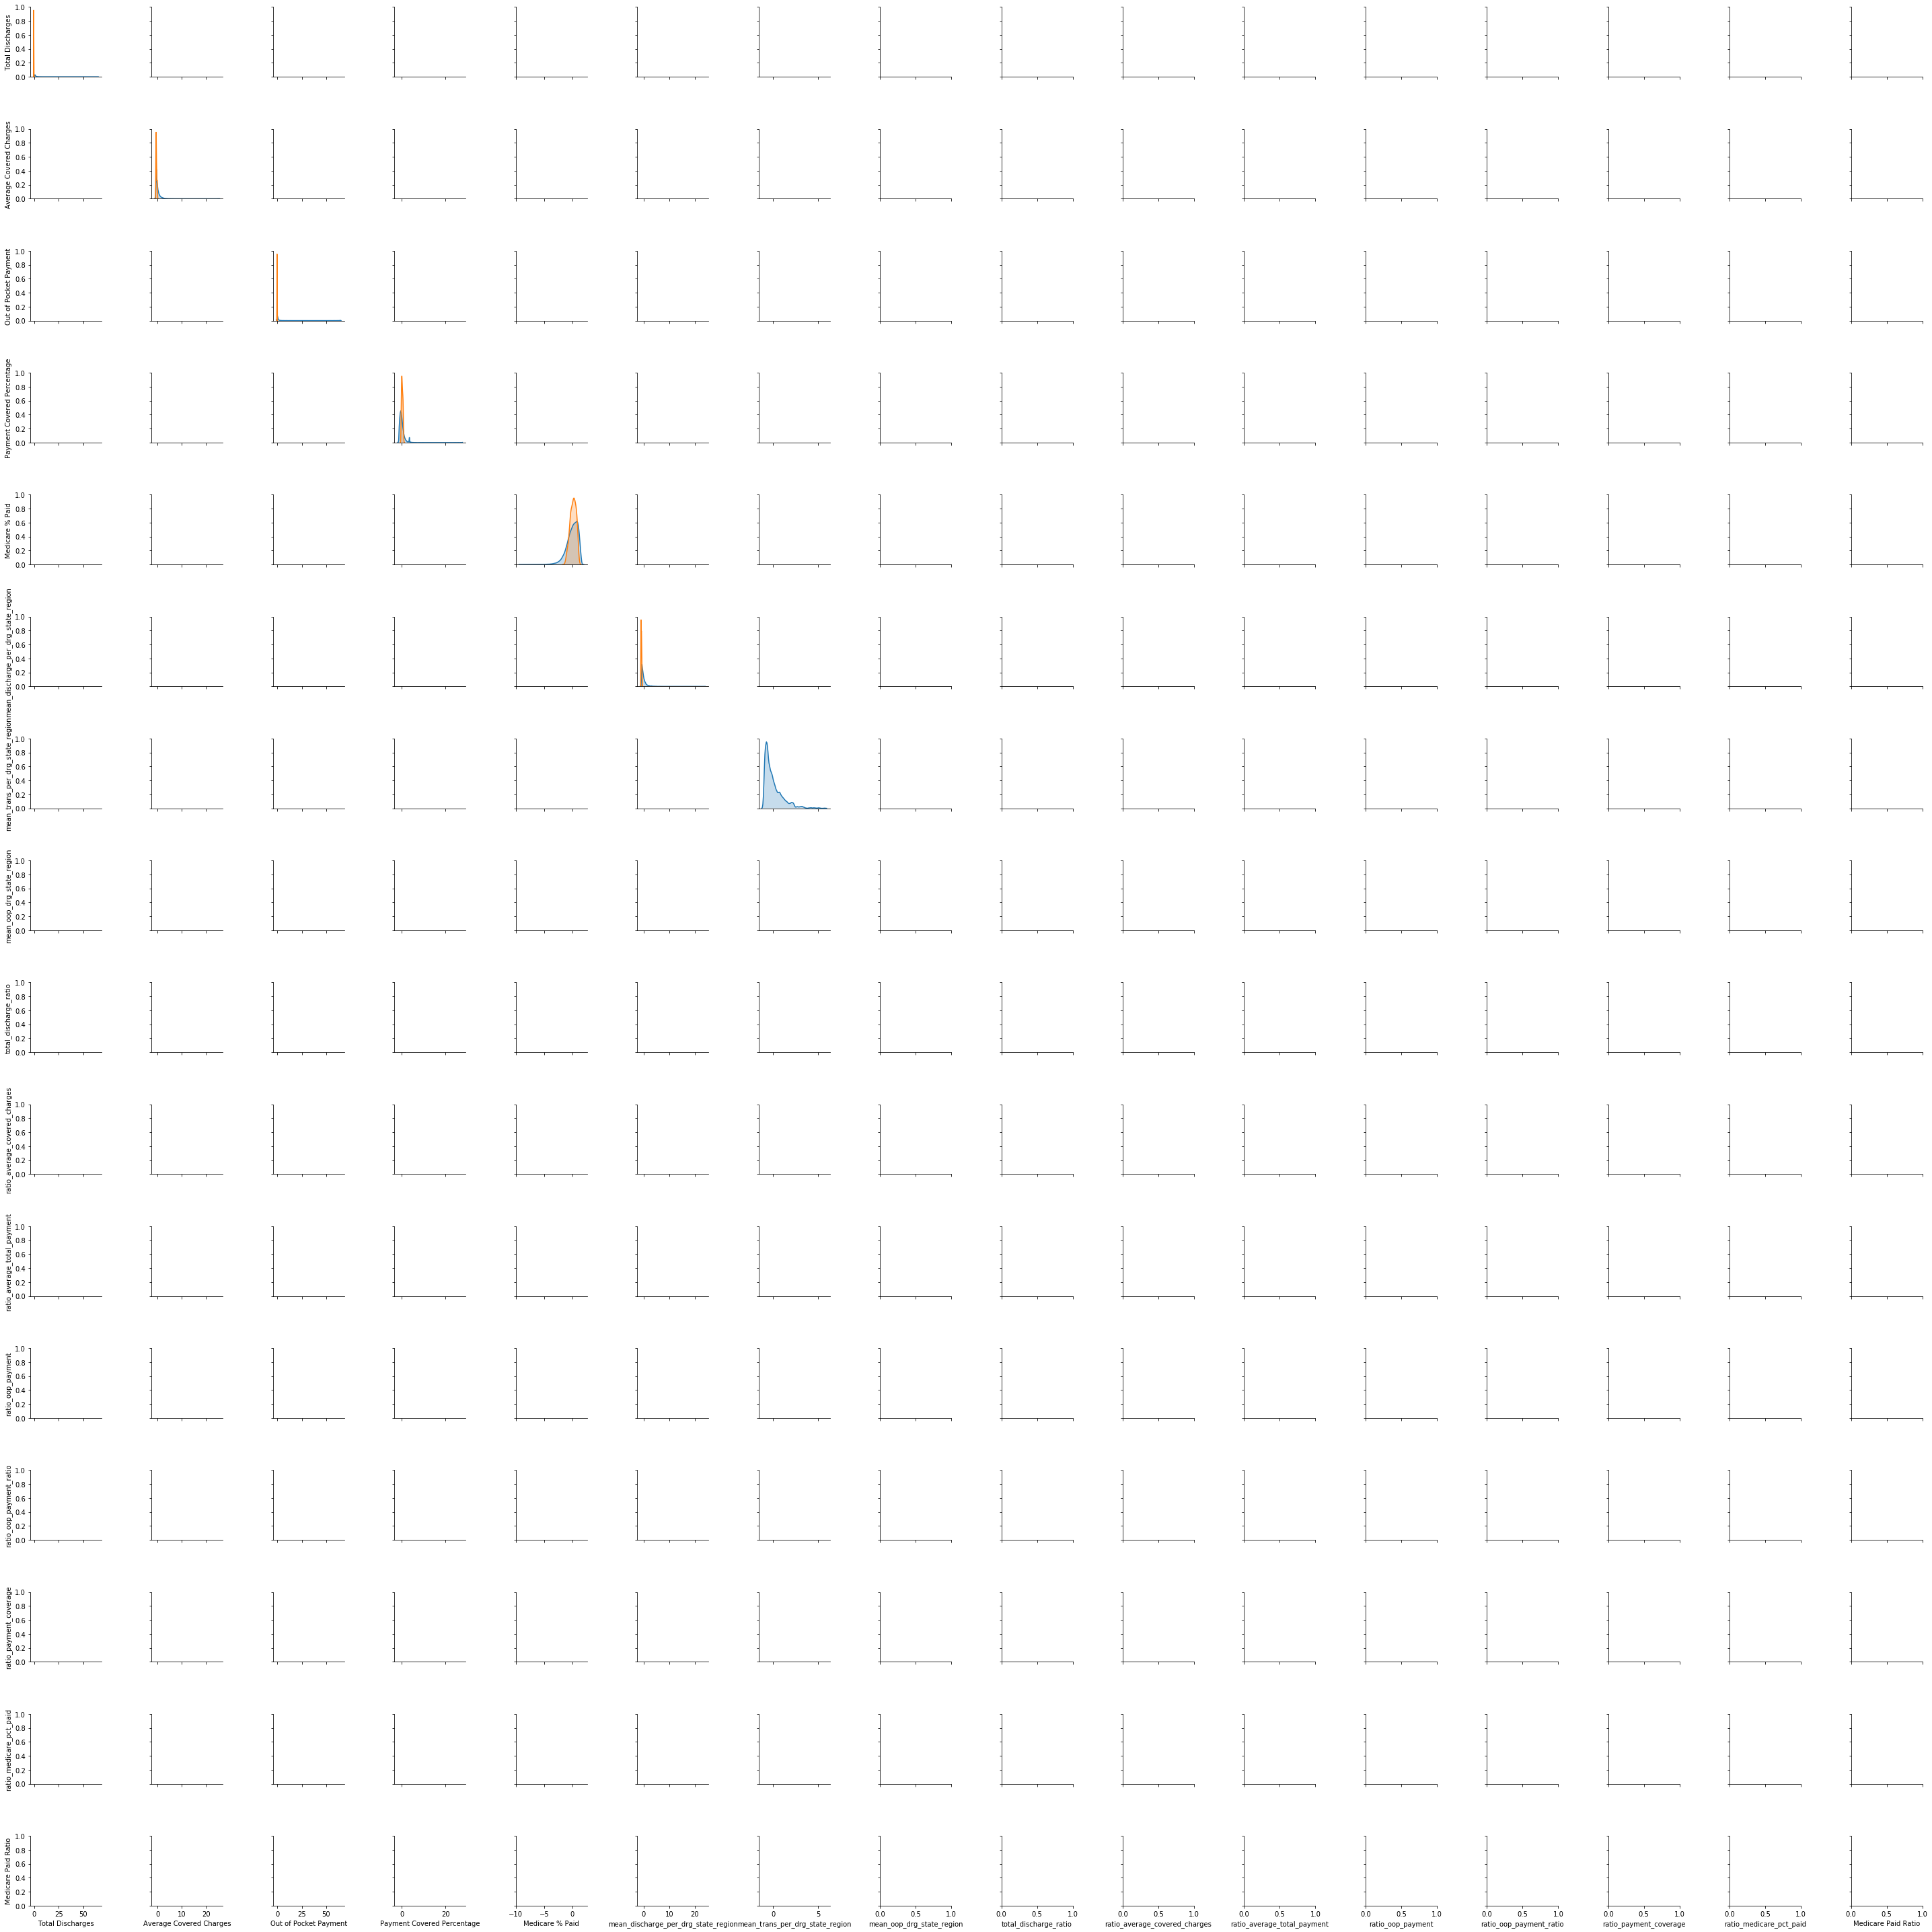

In [106]:
sns.pairplot(vif_num_dat, hue = 'DB Scan Label')

Mean Shift:

In [111]:
small_num_dat = num_dat[1:30000]
small_num_dat.head()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Out of Pocket Payment,Coverage Ratio,Out of Pocket per discharge,Payment Covered Percentage,Medicare % Paid,mean_discharge_per_drg_state_region,...,total_discharge_ratio,ratio_average_covered_charges,ratio_average_total_payment,ratio_average_medicare_payments,ratio_oop_payment,ratio_oop_payment_ratio,ratio_payment_coverage,ratio_medicare_pct_paid,region_avg_medicare_paid,Medicare Paid Ratio
1,14,15131.85,5787.57,4976.71,810.86,2.614543,57.918571,0.382476,0.859896,27.461538,...,0.509804,0.376065,1.008540,1.080948,0.714704,1.274242,1.873207,4.211412,0.804224,1.069224
2,24,37560.37,5434.95,4453.79,981.16,6.910895,40.881667,0.144699,0.819472,27.461538,...,0.873950,0.933470,0.947092,0.967369,0.864809,0.899420,0.708675,4.013431,0.804224,1.018959
3,25,13998.28,5417.56,4129.16,1288.40,2.583872,51.536000,0.387016,0.762181,27.461538,...,0.910364,0.347893,0.944062,0.896859,1.135614,1.133822,1.895443,3.732842,0.804224,0.947721
4,18,31633.27,5658.33,4851.44,806.89,5.590566,44.827222,0.178873,0.857398,27.461538,...,0.655462,0.786167,0.986018,1.053739,0.711205,0.986225,0.876044,4.199175,0.804224,1.066118
5,67,16920.79,6653.80,5374.14,1279.66,2.543027,19.099403,0.393232,0.807680,67.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.053951,0.807680,1.000000


In [121]:
# preparing data, dropping the DB Scan Label:
small_pca_dat = pca_dat.drop(['DB Scan Label'], axis =1)

# For the simplicity, I will not run the pca but just subseting the same amount:
small_pca_small = pca_dat[1:30000]

from sklearn.cluster import MeanShift,estimate_bandwidth

bandwith = estimate_bandwidth(small_pca_small)
ms = MeanShift(bandwidth=bandwith, bin_seeding=True)
ms.fit_predict(small_pca_small)



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
# The following bandwidth can be automatically detected using
ms_labels_pca = ms.labels_
ms_pca_cluster_centers = ms.cluster_centers_

ms_pca_labels_unique = np.unique(ms_labels_pca)
ms_pca_n_clusters_ = len(ms_pca_labels_unique)

print("number of estimated clusters : %d" % ms_pca_n_clusters_)

number of estimated clusters : 22


In [123]:
# how many observations in each cluster
cluster, count = np.unique(ms_labels_pca, return_counts=True)
dict(zip(cluster, count))

{0: 29519,
 1: 49,
 2: 3,
 3: 12,
 4: 92,
 5: 21,
 6: 1,
 7: 1,
 8: 51,
 9: 1,
 10: 1,
 11: 3,
 12: 2,
 13: 3,
 14: 12,
 15: 1,
 16: 4,
 17: 11,
 18: 5,
 19: 126,
 20: 1,
 21: 80}

NameError: name 'n_clusters_' is not defined

<Figure size 432x288 with 0 Axes>

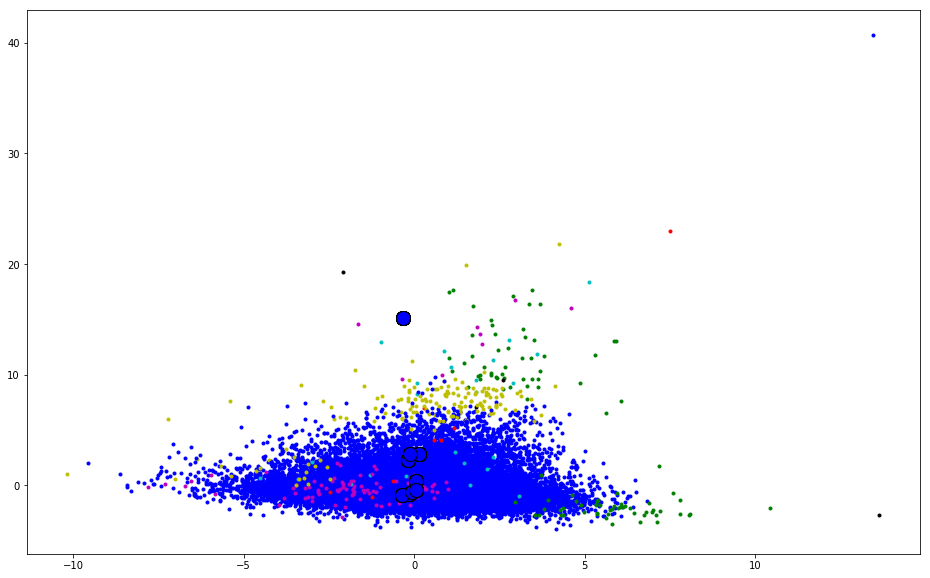

In [127]:
plt.figure(1)
plt.clf()

from itertools import cycle

fig = plt.figure(figsize=(16,10))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(ms_pca_n_clusters_), colors):
    my_members = ms_labels_pca == k
    cluster_center = ms_pca_cluster_centers[k]
    plt.plot(small_pca_small.iloc[my_members, 0], small_pca_small.iloc[my_members, 1], col + '.')
    plt.plot(ms_pca_cluster_centers[0], ms_pca_cluster_centers[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
pca_label, count = consolodate_outliers(ms_labels_pca, 0)
count